In [1]:
from keras.datasets import reuters

(train_data, train_labels),  (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 4s 2us/step


In [2]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]][3:])

decoded_newswire

'said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# keras にもutilファンクがある
"""
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

'\nfrom keras.utils.np_utils import to_categorical\n\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n'

In [22]:
type(one_hot_test_labels)

numpy.ndarray

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [26]:
model.compile(optimizer='rmsprop',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                                  partial_y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 204us/step - loss: 2.4913 - acc: 0.4927 - val_loss: 1.6736 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.3845 - acc: 0.7065 - val_loss: 1.2739 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.0434 - acc: 0.7719 - val_loss: 1.1147 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.8208 - acc: 0.8295 - val_loss: 1.0196 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.6576 - acc: 0.8646 - val_loss: 0.9676 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.5240 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.4278 - acc: 0.9119 - val_loss: 0.9101 - val_acc: 0.8040


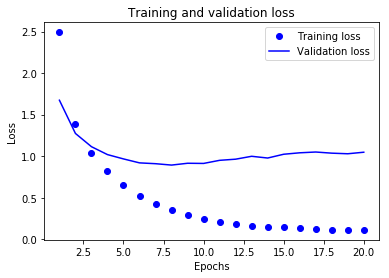

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

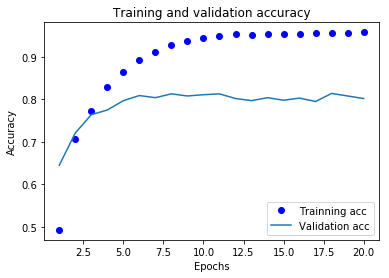

In [32]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Trainning acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

だいたい７エポックから過学習になってるっぽい

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

model.fit(partial_x_train,
                 partial_y_train,
                 epochs=8,
                 batch_size=512,
                 validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 167us/step - loss: 2.6801 - acc: 0.5331 - val_loss: 1.7694 - val_acc: 0.6550
Epoch 2/8
7982/7982 [==============================] - 1s 123us/step - loss: 1.4448 - acc: 0.6983 - val_loss: 1.3178 - val_acc: 0.6990
Epoch 3/8
7982/7982 [==============================] - 1s 125us/step - loss: 1.0637 - acc: 0.7720 - val_loss: 1.1451 - val_acc: 0.7440
Epoch 4/8
7982/7982 [==============================] - 1s 123us/step - loss: 0.8422 - acc: 0.8203 - val_loss: 1.0525 - val_acc: 0.7760
Epoch 5/8
7982/7982 [==============================] - 1s 124us/step - loss: 0.6710 - acc: 0.8561 - val_loss: 0.9675 - val_acc: 0.8000
Epoch 6/8
7982/7982 [==============================] - 1s 124us/step - loss: 0.5353 - acc: 0.8890 - val_loss: 0.9327 - val_acc: 0.8100
Epoch 7/8
7982/7982 [==============================] - 1s 124us/step - loss: 0.4295 - acc: 0.9105 - val_loss: 0.9128 - val_acc: 0.8140
Epoch 8

In [37]:
results

[1.0151618622502152, 0.7747105966692829]

In [38]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

array([[2.1463506e-05, 3.6573416e-05, 9.2682880e-05, ..., 8.3156641e-07,
        3.0081328e-06, 1.4300456e-06],
       [6.4011319e-03, 4.2104844e-02, 9.9699330e-03, ..., 2.5550656e-03,
        4.3990619e-07, 8.1691906e-05],
       [1.8315408e-02, 8.1087750e-01, 1.5104731e-03, ..., 3.1860571e-04,
        9.2726311e-04, 1.5620348e-03],
       ...,
       [2.8239456e-05, 1.5160340e-04, 1.2329090e-04, ..., 7.5904127e-06,
        3.4651348e-05, 2.0675663e-05],
       [6.1850681e-04, 2.1547420e-02, 9.1066128e-03, ..., 4.1506175e-04,
        1.9118421e-04, 5.9506443e-04],
       [7.2676531e-04, 5.7386124e-01, 1.2332493e-02, ..., 1.2280603e-03,
        3.5958746e-04, 1.1616357e-03]], dtype=float32)